# The Sparks Foundation

## Task :1 Prediction using Supervised ML

### Problem Statement- Predict the percentage of an student based on the no. of study hours. 


# GULAM MAZID

In [2]:
# Importing all libraries required in this notebook

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading data from remote link

In [11]:
url = "http://bit.ly/w-data"

In [12]:
dataset=pd.read_csv(url)

In [13]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [14]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
# Checking if there are any null values present

In [17]:
dataset.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


#### There are no null values in datset so, we can now visualize data.

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

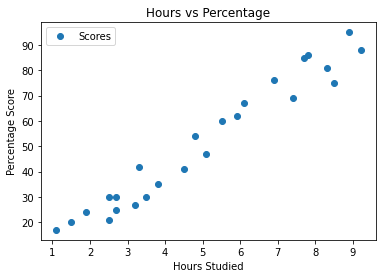

In [21]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### In the above graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [22]:
# Let's check correlation
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Splitting the data

#### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [24]:
# Defining X and y from the Data
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

In [25]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [26]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [27]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)


### Training the Algorithm


#### We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [28]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

### Plotting the regression line

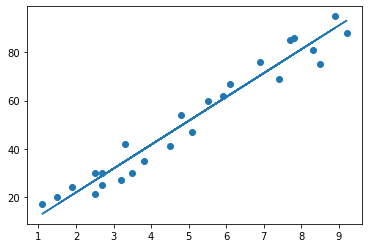

In [30]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making predictions

In [31]:
print(X_test) #In Hours
y_pred = regressor.predict(X_test) # Predicting scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing actual marks vs predicted marks


In [33]:
dataset_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataset_1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


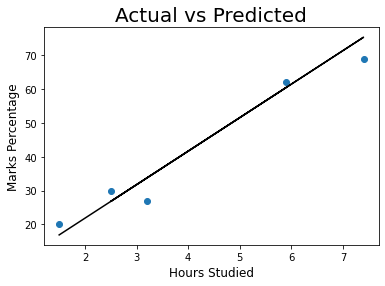

In [34]:

plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

#### Let's test with our own Data

In [35]:
hours = [9.25]
answer = regressor.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


### Model Evaluation

In [36]:
# Calculating the accuracy of the model
from sklearn.metrics import mean_absolute_error
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

Mean absolute error:  4.183859899002975


### Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.69 marks.